In [2]:
import torch
import numpy as np

import torchvision.transforms as transforms
from vlkit.image import norm255
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image

import os, sys
from os.path import abspath, dirname, join
cur_dir = abspath(os.getcwd())

sys.path.insert(0, '/cbs/projects/palm-recognition')
from models.mobilefacenet_cam import MobileFaceNet
from tfrecord.tfrecord_torch_loader import TFRecordDataset

In [3]:
model = torch.jit.load('mbfn_cam_extractor.pth')

In [4]:
dataset = TFRecordDataset("/youtu-face/ata_root/remote_tfrecord/ruixin_20210203/md_train_20210203_margin1.5_output896", index='all.index', transform=None)

num_classes: 18978, num_samples: 2876756


In [5]:
center_crop = transforms.CenterCrop(672)
transform = transforms.Compose([transforms.CenterCrop(672), transforms.ToTensor(), transforms.Normalize(mean = [0.5, 0.5, 0.5], std = [1, 1, 1])])

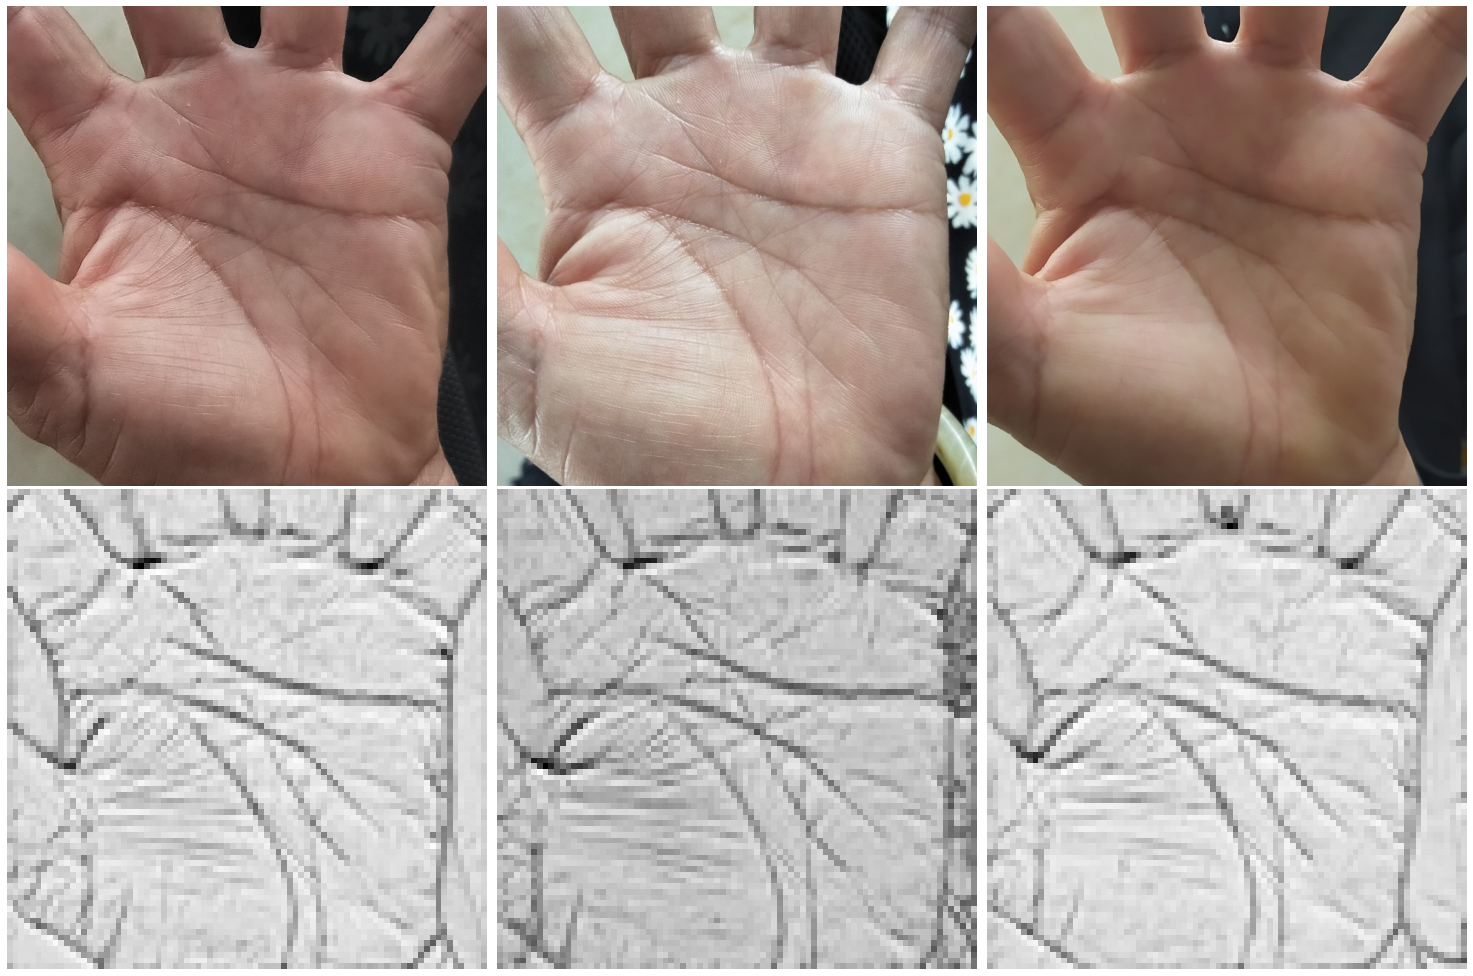

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(21, 14))
fig.tight_layout(h_pad=-2, w_pad=-2)

for ax in axes.flatten():
    ax.axis('off')

    
def extract_cam(index):
    im = transform(dataset[index]['image']).unsqueeze(dim=0)

    with torch.no_grad():
        cam = model(im).squeeze().numpy()
    return center_crop(dataset[index]['image']), Image.fromarray(norm255(cam))

im, cam = extract_cam(0)
axes[0, 0].imshow(im)
axes[1, 0].imshow(cam, cmap=cm.Greys_r)

im.save('palm0.png')
cam.save('cam0.png')

im, cam = extract_cam(6)
axes[0, 1].imshow(im)
axes[1, 1].imshow(cam, cmap=cm.Greys_r)
im.save('palm1.png')
cam.save('cam1.png')

im, cam = extract_cam(8)
axes[0, 2].imshow(im)
axes[1, 2].imshow(cam, cmap=cm.Greys_r)
im.save('palm1.png')
cam.save('cam1.png')

plt.savefig('./palm-cams.pdf')